In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib as plt

In [12]:
df = pd.read_csv('../dataset/금연_dtx.csv')

In [13]:
df

,금연성공여부,성별,연령,흡연시작연령,담배종류,하루흡연량,FTND
0,0,1,52,25,1,3,8
1,0,1,32,17,1,4,7
2,1,1,41,21,1,2,0
3,1,1,60,18,1,2,6
4,1,1,28,19,4,2,2
...,...,...,...,...,...,...,...
1050,0,2,33,17,1,2,6
1051,0,2,24,20,5,2,3
1052,0,2,49,30,1,2,2
1053,1,2,55,30,1,3,5


In [23]:
df['FTND']

[8, 7, 0, 6, 2, 5, 3, 4, 1, 10, 9]

# One-hot encoding

In [24]:
smoke_kind = pd.get_dummies(df['담배종류'], prefix = '담배종류')
sex = pd.get_dummies(df['성별'], prefix = '성별')
FTND = pd.get_dummies(df['FTND'], prefix= 'FTND')

In [15]:
X = df.drop(['금연성공여부'],axis=1)
y = df['금연성공여부']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, shuffle=True,  random_state=34)

In [16]:
params = {

}

In [17]:
model = XGBClassifier(**params)

xgb_model = model.fit(X_train, y_train)

/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:19:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
y_pre = xgb_model.predict(X_valid)
y_pred_probs = xgb_model.predict_proba(X_valid)[:,1]

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
p = precision_score(y_valid, y_pre)
print(p)
r = recall_score(y_valid, y_pre)
print(r)
f1 = f1_score(y_valid, y_pre)
print(f1)
accuracy = accuracy_score(y_valid, y_pre)
print(accuracy)

0.2692307692307692
0.19444444444444445
0.22580645161290322
0.5471698113207547


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/IPython/core/pylabtools.py:151

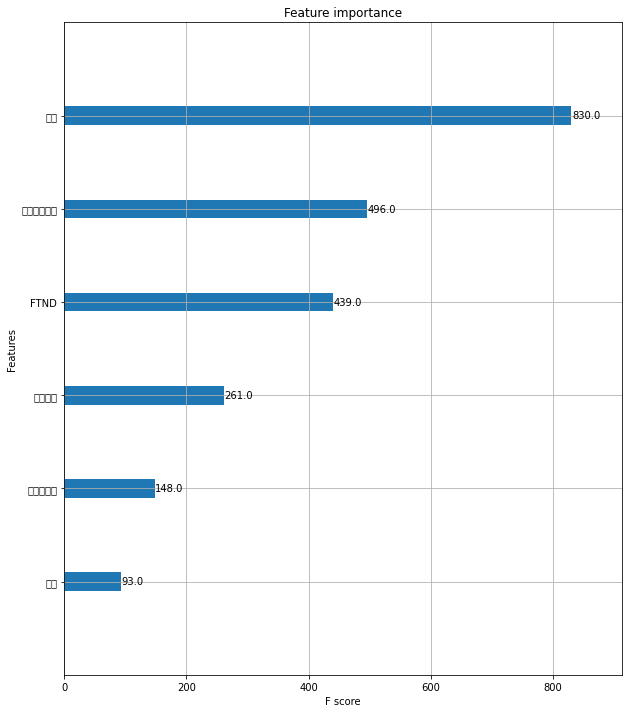

In [33]:
from matplotlib import pyplot as plt
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)